In [64]:
import pandas as pd
import numpy as np
import math
from sklearn import model_selection
import platform
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc

#연습경기 성정
pre_season = pd.read_csv('data/Pre_Season_Batter.csv')

#정규시즌 성적을 포함하여 개인정보
regular_season = pd.read_csv('data/Regular_Season_Batter.csv')

# 타자들의 일자 별 정규시즌 성적
regular_season_batter = pd.read_csv('data/Regular_Season_Batter_Day_by_Day_b4.csv')

In [59]:
pre_season

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,...,1,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959
1,1,강경학,2011,한화,0.000,4,2,2,0,0,...,0,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500
2,1,강경학,2014,한화,-,4,0,2,0,0,...,0,NaN,NaN,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,NaN
3,1,강경학,2015,한화,0.130,10,23,3,3,0,...,0,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416
4,1,강경학,2016,한화,0.188,14,32,4,6,1,...,0,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,342,황재균,2014,롯데,0.407,10,27,3,11,2,...,0,0.593,0.448,1,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,1.041
1389,342,황재균,2015,롯데,0.333,11,30,8,10,3,...,0,0.433,0.389,0,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.822
1390,342,황재균,2016,롯데,0.310,16,42,8,13,3,...,0,0.429,0.370,1,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.799
1391,342,황재균,2018,KT,0.250,6,16,3,4,1,...,0,0.500,0.333,3,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.833


In [73]:
regular_season_kia = regular_season[regular_season['team'] == '한화']

In [74]:
regular_season_kia.sort_values(by = ['batter_id', 'year'])

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.00000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.00000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.34900,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.68600
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.32500,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.67300
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,5,0.25700,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.48900
5,1,강경학,2017,한화,0.214,59,84,17,18,2,...,1,0.26200,0.290,4,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.55200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378,332,허도환,2015,한화,0.176,61,91,8,16,7,...,3,0.28600,0.272,3,176cm/87kg,1984년 07월 31일,포수(우투우타),서울학동초-이수중-서울고-단국대-두산-넥센-한화,NaN,0.55800
2379,332,허도환,2016,한화,0.218,48,78,9,17,8,...,2,0.32100,0.315,1,176cm/87kg,1984년 07월 31일,포수(우투우타),서울학동초-이수중-서울고-단국대-두산-넥센-한화,NaN,0.63600
2380,332,허도환,2017,한화,0.225,30,40,4,9,3,...,2,0.37500,0.326,0,176cm/87kg,1984년 07월 31일,포수(우투우타),서울학동초-이수중-서울고-단국대-두산-넥센-한화,NaN,0.70100
2392,334,호잉,2018,한화,0.306,142,529,85,162,47,...,5,0.57300,0.369,4,190cm/92kg,1989년 05월 18일,외야수(우투좌타),미국 Fort Loramie(고)-미국 Toledo(대),300000달러,0.94200


In [62]:
#regular_season_batter_kia = regular_season_batter[regular_season_batter['opposing_team'] == 'KIA']



In [66]:
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()



In [67]:
matplotlib.rcParams['axes.unicode_minus'] = False

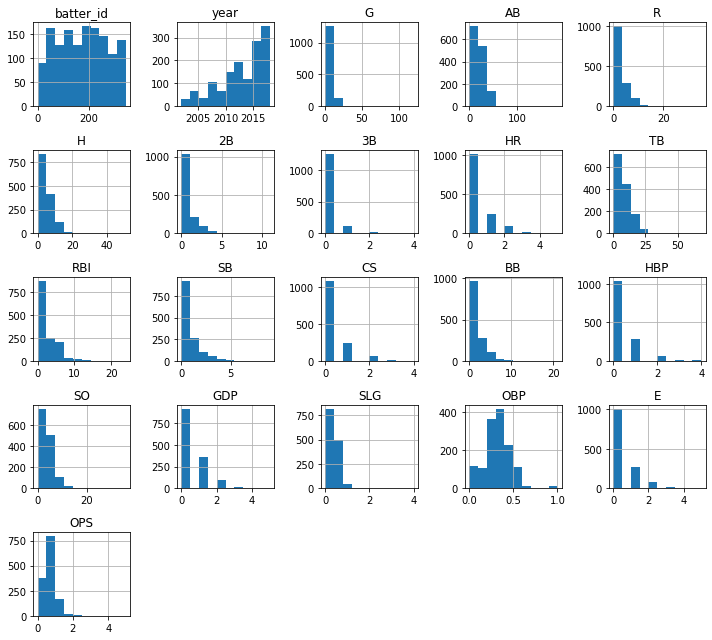

In [75]:
pre_season.hist(figsize=(10,9))
plt.tight_layout()
plt.show()

In [83]:
#정규 시즌 데이터에서 2002 년 이후의 여도별 기록된 선수의 수
regular_count = regular_season.groupby('year')['batter_id'].count().rename('regular')

In [84]:
#연도별 선수
regular_count

year
1993      1
1994      2
1995      1
1996      7
1997      8
1998     10
1999     14
2000     20
2001     32
2002     43
2003     54
2004     68
2005     73
2006     85
2007     98
2008    115
2009    124
2010    130
2011    151
2012    174
2013    194
2014    186
2015    207
2016    213
2017    217
2018    227
Name: regular, dtype: int64

In [85]:
pre_season_count = pre_season.groupby('year')['batter_id'].count().rename('preseason')
pre_season_count

year
2002     12
2003     19
2004     28
2005     37
2006     36
2007     43
2008     61
2009     66
2010     72
2011     75
2012     87
2013    104
2014    117
2015    134
2016    153
2017    167
2018    182
Name: preseason, dtype: int64

In [89]:
#transpose

season_count = pd.concat([regular_count, pre_season_count, np.round(pre_season_count/regular_count, 2).rename('ratio')], axis=1).transpose().loc[:, 2002:]

In [87]:
season_count

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
regular,43.00,54.00,68.00,73.00,85.00,98.00,115.00,124.00,130.00,151.0,174.0,194.00,186.00,207.00,213.00,217.00,227.0
preseason,12.00,19.00,28.00,37.00,36.00,43.00,61.00,66.00,72.00,75.0,87.0,104.00,117.00,134.00,153.00,167.00,182.0
ratio,0.28,0.35,0.41,0.51,0.42,0.44,0.53,0.53,0.55,0.5,0.5,0.54,0.63,0.65,0.72,0.77,0.8
